In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 8 類 為 ship


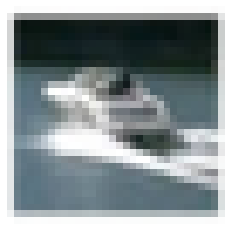

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import ResNet50V2
cnn = ResNet50V2(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
x = Dense(1024, activation="relu")(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_ResNet152V2.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.00001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=20,
          validation_split=0.1, callbacks=callback)

Epoch 1/20
150/150 [==============================] - 5s 34ms/step - loss: 12.8796 - accuracy: 0.2144 - val_loss: 6.0053 - val_accuracy: 0.2510
Epoch 2/20
150/150 [==============================] - 4s 26ms/step - loss: 5.1957 - accuracy: 0.2746 - val_loss: 4.7885 - val_accuracy: 0.2810
Epoch 3/20
150/150 [==============================] - 4s 26ms/step - loss: 4.2847 - accuracy: 0.3013 - val_loss: 4.3661 - val_accuracy: 0.2918
Epoch 4/20
150/150 [==============================] - 4s 26ms/step - loss: 3.8354 - accuracy: 0.3209 - val_loss: 4.1099 - val_accuracy: 0.3288
Epoch 5/20
150/150 [==============================] - 4s 26ms/step - loss: 3.5004 - accuracy: 0.3356 - val_loss: 3.3617 - val_accuracy: 0.3276
Epoch 6/20
150/150 [==============================] - 3s 23ms/step - loss: 3.0886 - accuracy: 0.3536 - val_loss: 3.5971 - val_accuracy: 0.3202
Epoch 7/20
150/150 [==============================] - 3s 22ms/step - loss: 2.9579 - accuracy: 0.3615 - val_loss: 3.5114 - val_accuracy: 0.320

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 2.8572 - accuracy: 0.3468


[2.857175827026367, 0.3467999994754791]

In [17]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[2.56028943e-05, 4.56742756e-02, 2.47952580e-01, ...,
        1.43810555e-01, 1.29507773e-03, 5.09775460e-01],
       [1.74704894e-01, 1.22722592e-02, 5.36180742e-04, ...,
        5.46878982e-06, 7.77503550e-01, 3.49725410e-02],
       [3.32379192e-02, 3.25774342e-01, 3.01518552e-02, ...,
        2.06794924e-04, 3.86209190e-01, 5.55673949e-02],
       ...,
       [6.67937420e-05, 1.89148239e-03, 2.88531906e-03, ...,
        1.21914931e-02, 4.64432826e-03, 4.74069442e-04],
       [5.21660503e-03, 8.44785757e-03, 1.27129480e-02, ...,
        4.43262577e-01, 8.20592305e-08, 1.89907655e-01],
       [1.69877690e-04, 2.33882088e-06, 1.11620146e-04, ...,
        9.61971819e-01, 5.81723230e-04, 3.39662619e-02]], dtype=float32)

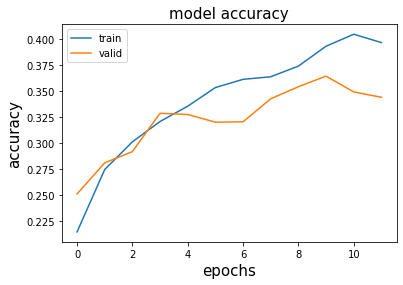

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

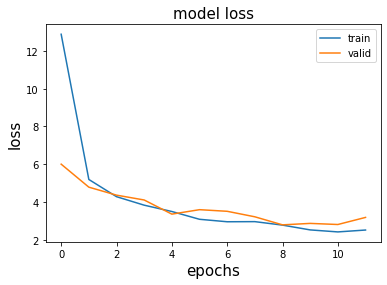

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 加了 Adam(learning_rate=0.0001)之後可以讓整體機率提升
#### val_accuracy 由 0.02 提升 0.36